In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

plt.style.use('seaborn-poster')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('train.csv')
data = data.drop(1400, axis = 0)
data.tail()

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
1395,ADF1956,136.0,4.53,270.3344,6.58,2.50,7410.7529,62.0,9504.0,10820.0,1.0,NaN,NaN,PQza,Zintel,0.0
1396,ADF1965,1795.0,59.83,1024.8460,111.99,10.00,493671.9863,149.0,18202.0,40730.0,2.0,NaN,NaN,Mango,Zintel,0.0
1397,ADF1967,203.0,6.77,1143.4972,19.84,13.75,261.9307,284.0,360.0,81341.0,3.0,NaN,NaN,Zintel,Zintel,0.0
1398,ADF1971,109.0,3.63,45.0900,0.00,0.00,658162.2734,20.0,240.0,3611.0,1.0,NaN,3G,Uxaa,Zintel,1.0
1399,ADF1982,904.0,30.13,161.1300,0.00,17.50,45187.7549,57.0,1728.0,10529.0,1.0,NaN,NaN,ToCall,Zintel,1.0


In [3]:
data.isnull().sum()

Customer ID                                      0
network_age                                      0
Customer tenure in month                         0
Total Spend in Months 1 and 2 of 2017            0
Total SMS Spend                                  0
Total Data Spend                                 0
Total Data Consumption                           0
Total Unique Calls                               0
Total Onnet spend                                0
Total Offnet spend                               0
Total Call centre complaint calls                0
Network type subscription in Month 1           175
Network type subscription in Month 2           144
Most Loved Competitor network in in Month 1      1
Most Loved Competitor network in in Month 2      1
Churn Status                                     0
dtype: int64

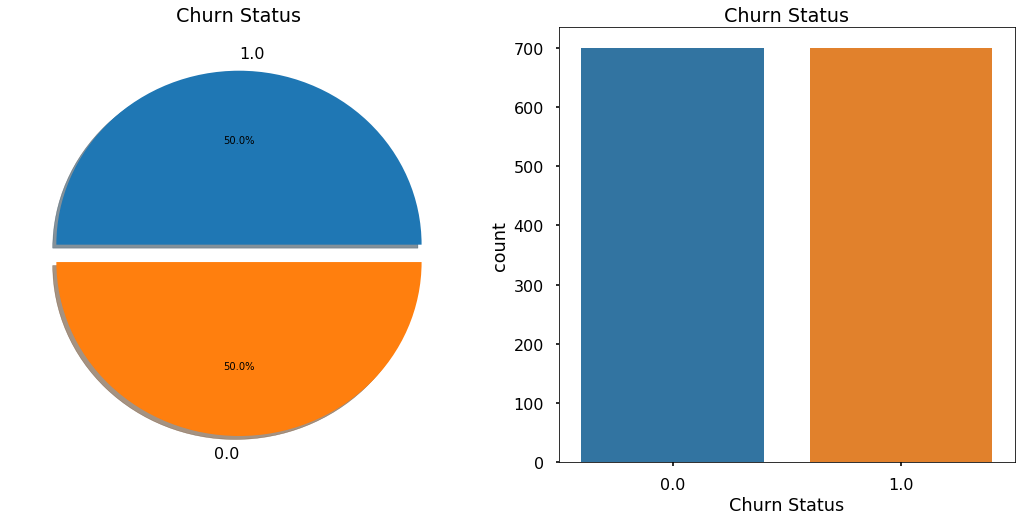

In [4]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Churn Status'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0], shadow=True)
ax[0].set_title('Churn Status')
ax[0].set_ylabel('')
sns.countplot('Churn Status',data=data,ax=ax[1])
ax[1].set_title('Churn Status')
plt.show()

In [5]:
data.groupby(['Network type subscription in Month 1','Churn Status'])['Churn Status'].count()

Network type subscription in Month 1  Churn Status
2G                                    0.0             149
                                      1.0             155
3G                                    0.0             334
                                      1.0             302
Other                                 0.0             119
                                      1.0             166
Name: Churn Status, dtype: int64

In [6]:
data.groupby(['Network type subscription in Month 2','Churn Status'])['Churn Status'].count()

Network type subscription in Month 2  Churn Status
2G                                    0.0             138
                                      1.0             146
3G                                    0.0             367
                                      1.0             320
Other                                 0.0             119
                                      1.0             166
Name: Churn Status, dtype: int64

In [7]:
data.columns

Index(['Customer ID', 'network_age', 'Customer tenure in month',
       'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend',
       'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls',
       'Total Onnet spend ', 'Total Offnet spend',
       'Total Call centre complaint calls',
       'Network type subscription in Month 1',
       'Network type subscription in Month 2',
       'Most Loved Competitor network in in Month 1',
       'Most Loved Competitor network in in Month 2', 'Churn Status'],
      dtype='object')

In [8]:
data['Network type subscription in Month 2'].replace(['3G','2G','Other'],[3,2,1], inplace = True)

In [9]:
data.head()

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
0,ADF0039,123.0,4.10,76.7140,0.00,1.25,1.4951,14.0,564.0,6408.0,2.0,2G,2.0,Uxaa,Mango,0.0
1,ADF0041,1316.0,43.87,98.8904,4.14,1.25,1.0244,27.0,1626.0,4373.0,1.0,2G,2.0,Uxaa,Mango,0.0
2,ADF0051,2385.0,79.50,372.6300,3.51,1.25,6.0898,119.0,10411.0,22039.0,1.0,2G,2.0,Weematel,Mango,0.0
3,ADF0059,1614.0,53.80,530.2000,6.85,1.25,3.3447,69.0,6822.0,6274.0,1.0,2G,2.0,0,Mango,0.0
4,ADF0060,2175.0,72.50,554.1300,6.99,153.75,673204.0342,33.0,3387.0,7241.0,1.0,2G,3.0,Weematel,Mango,0.0


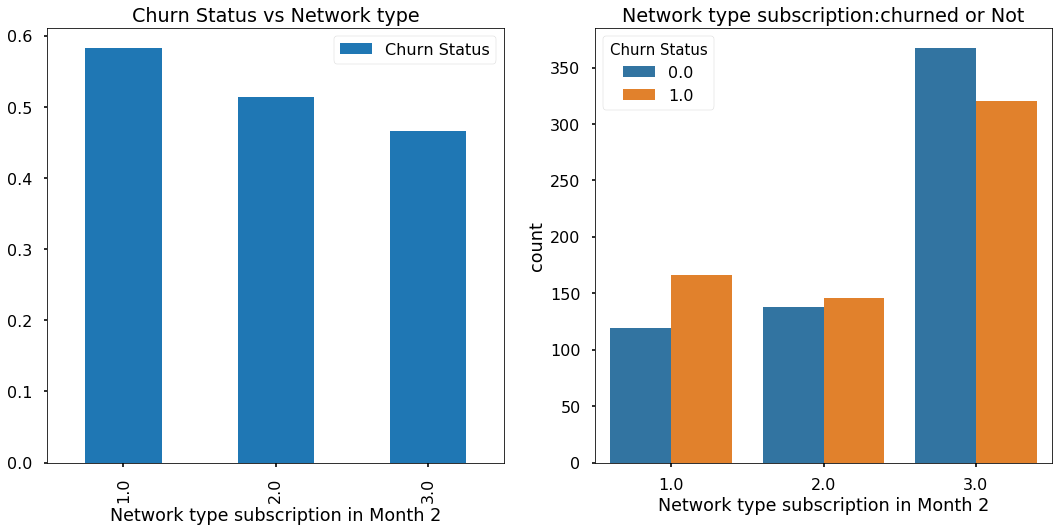

In [17]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Network type subscription in Month 2','Churn Status']].groupby(['Network type subscription in Month 2']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Churn Status vs Network type')
sns.countplot('Network type subscription in Month 2',hue='Churn Status',data=data,ax=ax[1])
ax[1].set_title('Network type subscription:churned or Not')
plt.show()

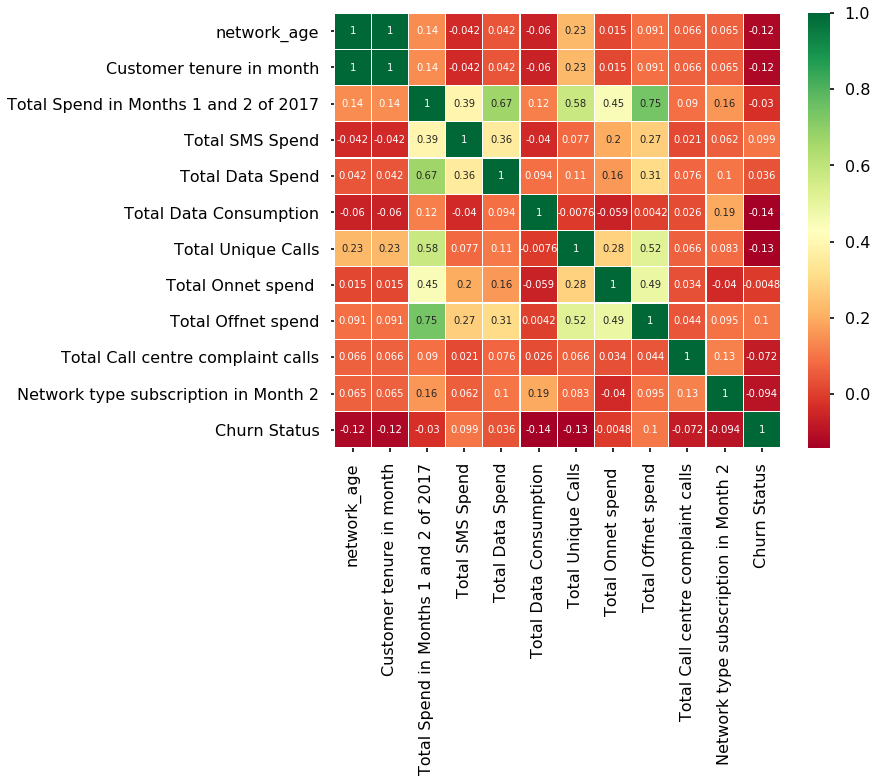

In [18]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()